In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,precision_score,recall_score,f1_score,roc_auc_score

###### Load the dataset from the CSV file

In [2]:
df = pd.read_csv('AnomaData.csv')

In [3]:
df.head()

,time,y,x1,x2,x3,x4,x5,x6,x7,x8,...,x51,x52,x54,x55,x56,x57,x58,x59,x60,y.1
0,05-01-1999 00:00,0,0.376665,-4.596435,-4.095756,13.497687,-0.118830,-20.669883,0.000732,-0.061114,...,29.984624,10.091721,-4.936434,-24.590146,18.515436,3.473400,0.033444,0.953219,0.006076,0
1,05-01-1999 00:02,0,0.475720,-4.542502,-4.018359,16.230659,-0.128733,-18.758079,0.000732,-0.061114,...,29.984624,10.095871,-4.937179,-32.413266,22.760065,2.682933,0.033536,1.090502,0.006083,0
2,05-01-1999 00:04,0,0.363848,-4.681394,-4.353147,14.127997,-0.138636,-17.836632,0.010803,-0.061114,...,29.984624,10.100265,-4.937924,-34.183774,27.004663,3.537487,0.033629,1.840540,0.006090,0
3,05-01-1999 00:06,0,0.301590,-4.758934,-4.023612,13.161566,-0.148142,-18.517601,0.002075,-0.061114,...,29.984624,10.104660,-4.938669,-35.954281,21.672449,3.986095,0.033721,2.554880,0.006097,0
4,05-01-1999 00:08,0,0.265578,-4.749928,-4.333150,15.267340,-0.155314,-17.505913,0.000732,-0.061114,...,29.984624,10.109054,-4.939414,-37.724789,21.907251,3.601573,0.033777,1.410494,0.006105,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18398 entries, 0 to 18397
Data columns (total 62 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   time    18398 non-null  object 
 1   y       18398 non-null  int64  
 2   x1      18398 non-null  float64
 3   x2      18398 non-null  float64
 4   x3      18398 non-null  float64
 5   x4      18398 non-null  float64
 6   x5      18398 non-null  float64
 7   x6      18398 non-null  float64
 8   x7      18398 non-null  float64
 9   x8      18398 non-null  float64
 10  x9      18398 non-null  float64
 11  x10     18398 non-null  float64
 12  x11     18398 non-null  float64
 13  x12     18398 non-null  float64
 14  x13     18398 non-null  float64
 15  x14     18398 non-null  float64
 16  x15     18398 non-null  float64
 17  x16     18398 non-null  float64
 18  x17     18398 non-null  float64
 19  x18     18398 non-null  float64
 20  x19     18398 non-null  float64
 21  x20     18398 non-null  float64
 22

##### Exploratory Data Analysis (EDA)

In [5]:
df.isnull().sum()

time    0
y       0
x1      0
x2      0
x3      0
       ..
x57     0
x58     0
x59     0
x60     0
y.1     0
Length: 62, dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
df.describe()

,y,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x51,x52,x54,x55,x56,x57,x58,x59,x60,y.1
count,18398.000000,18398.000000,18398.000000,18398.000000,18398.000000,18398.000000,18398.000000,18398.000000,18398.000000,18398.000000,...,18398.000000,18398.000000,18398.000000,18398.000000,18398.000000,18398.000000,18398.000000,18398.000000,18398.000000,18398.000000
mean,0.006740,0.011824,0.157986,0.569300,-9.958345,0.006518,2.387533,0.001647,-0.004125,-0.003056,...,-3.357339,0.380519,0.173708,2.379154,9.234953,0.233493,-0.001861,-0.061522,0.001258,0.001033
std,0.081822,0.742875,4.939762,5.937178,131.033712,0.634054,37.104012,0.108870,0.075460,0.156047,...,348.256716,6.211598,3.029516,67.940694,81.274103,2.326838,0.048732,10.394085,0.004721,0.032120
min,0.000000,-3.787279,-17.316550,-18.198509,-322.781610,-1.623988,-279.408440,-0.429273,-0.451141,-0.120087,...,-3652.989000,-187.943440,-8.210370,-230.574030,-269.039500,-12.640370,-0.149790,-100.810500,-0.012229,0.000000
25%,0.000000,-0.405681,-2.158235,-3.537054,-111.378372,-0.446787,-24.345268,-0.058520,-0.051043,-0.059966,...,29.984624,-3.672684,0.487780,-40.050046,-45.519149,-1.598804,0.000470,0.295023,-0.001805,0.000000
50%,0.000000,0.128245,-0.075505,-0.190683,-14.881585,-0.120745,10.528435,-0.009338,-0.000993,-0.030057,...,29.984624,0.294846,0.702299,17.471317,1.438806,0.085826,0.012888,0.734591,0.000710,0.000000
75%,0.000000,0.421222,2.319297,3.421223,92.199134,0.325152,32.172974,0.060515,0.038986,0.001990,...,29.984624,5.109543,2.675751,44.093387,63.209681,2.222118,0.020991,1.266506,0.004087,0.000000
max,1.000000,3.054156,16.742105,15.900116,334.694098,4.239385,96.060768,1.705590,0.788826,4.060033,...,40.152348,14.180588,6.637265,287.252017,252.147455,6.922008,0.067249,6.985460,0.020510,1.000000


In [16]:
#df.fillna(df.mean(), inplace=True)

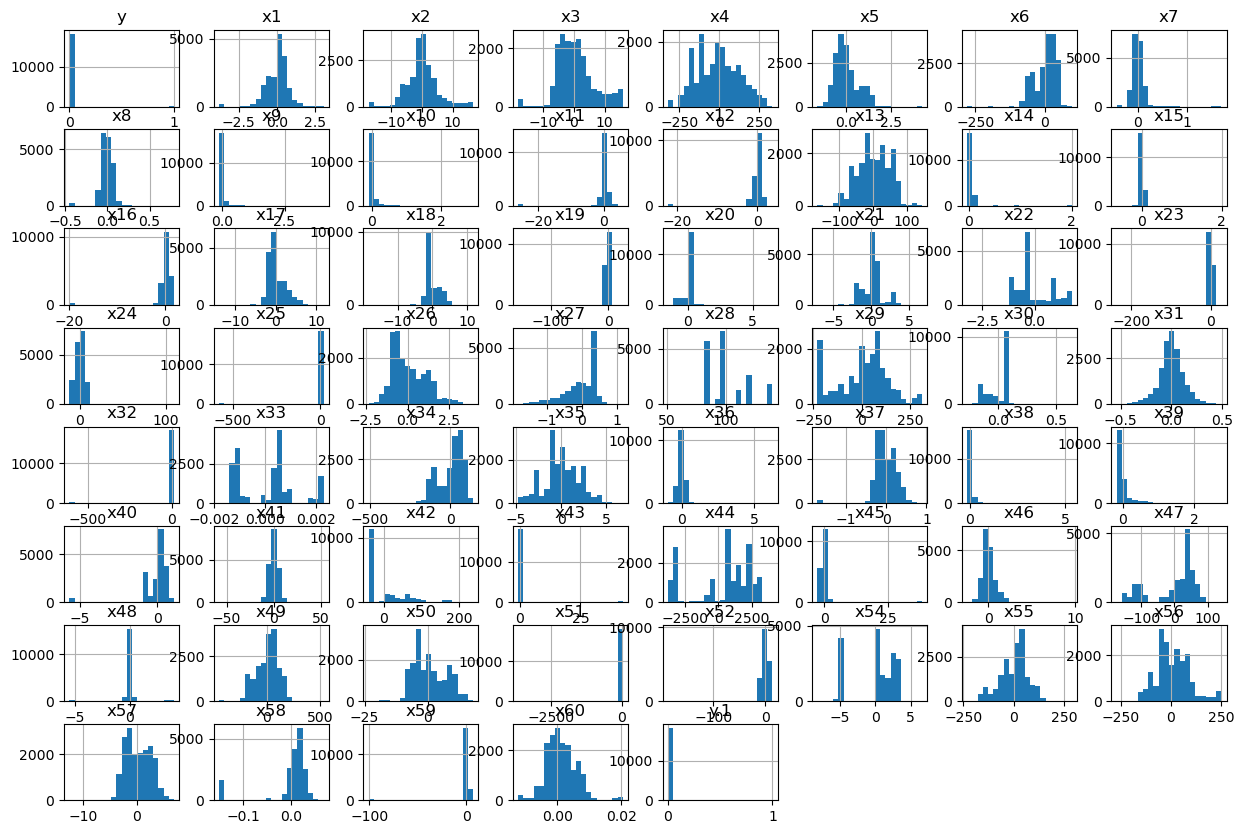

In [8]:
# Visualize the distribution of each column
df.hist(figsize=(15, 10), bins=20)
plt.show()

###### Convert Time Column to Correct Datatype

In [10]:
if 'time' in df.columns:
    df['time'] = pd.to_datetime(df['time'], errors='coerce')

    # Extract features like hour, day, month from the 'time' column
    df['hour'] = df['time'].dt.hour
    df['day'] = df['time'].dt.day
    df['month'] = df['time'].dt.month

    # Drop the 'time' column if no longer necessary
    df.drop(columns=['time'], inplace=True)

# Preview changes
print(df.head())

   y        x1        x2        x3         x4        x5         x6        x7  \
0  0  0.376665 -4.596435 -4.095756  13.497687 -0.118830 -20.669883  0.000732   
1  0  0.475720 -4.542502 -4.018359  16.230659 -0.128733 -18.758079  0.000732   
2  0  0.363848 -4.681394 -4.353147  14.127997 -0.138636 -17.836632  0.010803   
3  0  0.301590 -4.758934 -4.023612  13.161566 -0.148142 -18.517601  0.002075   
4  0  0.265578 -4.749928 -4.333150  15.267340 -0.155314 -17.505913  0.000732   

         x8        x9  ...        x55        x56       x57       x58  \
0 -0.061114 -0.059966  ... -24.590146  18.515436  3.473400  0.033444   
1 -0.061114 -0.059966  ... -32.413266  22.760065  2.682933  0.033536   
2 -0.061114 -0.030057  ... -34.183774  27.004663  3.537487  0.033629   
3 -0.061114 -0.019986  ... -35.954281  21.672449  3.986095  0.033721   
4 -0.061114 -0.030057  ... -37.724789  21.907251  3.601573  0.033777   

        x59       x60  y.1  hour  day  month  
0  0.953219  0.006076    0   0.0  1.0  

###### Feature Engineering & Feature Selection

In [11]:
X = df.drop(columns=['y'])
y = df['y']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

##### Train/Test Split with Sampling Distribution

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, stratify=y, random_state=42)

# Check the distribution of the target variable in the train/test sets
print(f'Train set distribution:\n{y_train.value_counts()}')
print(f'Test set distribution:\n{y_test.value_counts()}')

Train set distribution:
y
0    14619
1       99
Name: count, dtype: int64
Test set distribution:
y
0    3655
1      25
Name: count, dtype: int64


##### Metrics for Model Evaluation
For anomaly detection, accuracy might not always be the best metric, especially for imbalanced datasets. You can also use precision, recall, F1-score, or AUC-ROC.

In [13]:
def evaluate_model(y_test, y_pred):
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
    print(f"Precision: {precision_score(y_test, y_pred):.2f}")
    print(f"Recall: {recall_score(y_test, y_pred):.2f}")
    print(f"F1 Score: {f1_score(y_test, y_pred):.2f}")
    print(f"ROC AUC: {roc_auc_score(y_test, y_pred):.2f}")
    print("Classification Report:\n", classification_report(y_test, y_pred))

###### Model Selection, Training, Predicting, and Assessment

In [14]:
rf = RandomForestClassifier(random_state=42)

# Train the model
rf.fit(X_train, y_train)

# Predict on the test set
y_pred = rf.predict(X_test)

# Evaluate the model
evaluate_model(y_test, y_pred)

Accuracy: 1.00
Precision: 0.85
Recall: 0.68
F1 Score: 0.76
ROC AUC: 0.84
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3655
           1       0.85      0.68      0.76        25

    accuracy                           1.00      3680
   macro avg       0.92      0.84      0.88      3680
weighted avg       1.00      1.00      1.00      3680



###### Hyperparameter Tuning and Model Improvement

In [15]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Initialize GridSearchCV
#grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
                           cv=2, n_jobs=-1, verbose=2, scoring='accuracy')

# Fit grid search
grid_search.fit(X_train, y_train)

# Best parameters
print(f"Best Parameters: {grid_search.best_params_}")

# Evaluate the best model
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)
evaluate_model(y_test, y_pred_best)

Fitting 2 folds for each of 27 candidates, totalling 54 fits
Best Parameters: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 200}
Accuracy: 1.00
Precision: 0.94
Recall: 0.68
F1 Score: 0.79
ROC AUC: 0.84
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3655
           1       0.94      0.68      0.79        25

    accuracy                           1.00      3680
   macro avg       0.97      0.84      0.89      3680
weighted avg       1.00      1.00      1.00      3680



###### Model Validation

In [17]:
from sklearn.model_selection import cross_val_score

# Cross-validate the best model using 5-fold cross-validation
cv_scores = cross_val_score(best_model, X_train, y_train, cv=5, scoring='accuracy')

# Print cross-validation results
print(f'Cross-Validation Scores: {cv_scores}')
print(f'Mean Cross-Validation Score: {np.mean(cv_scores):.2f}')
print(f'Standard Deviation of CV Scores: {np.std(cv_scores):.2f}')

Cross-Validation Scores: [0.99592391 0.99592391 0.99558424 0.9969419  0.99660211]
Mean Cross-Validation Score: 1.00
Standard Deviation of CV Scores: 0.00


In [18]:
y_test_pred = best_model.predict(X_test)

# Evaluate model performance on the test set
evaluate_model(y_test, y_test_pred)

Accuracy: 1.00
Precision: 0.94
Recall: 0.68
F1 Score: 0.79
ROC AUC: 0.84
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3655
           1       0.94      0.68      0.79        25

    accuracy                           1.00      3680
   macro avg       0.97      0.84      0.89      3680
weighted avg       1.00      1.00      1.00      3680



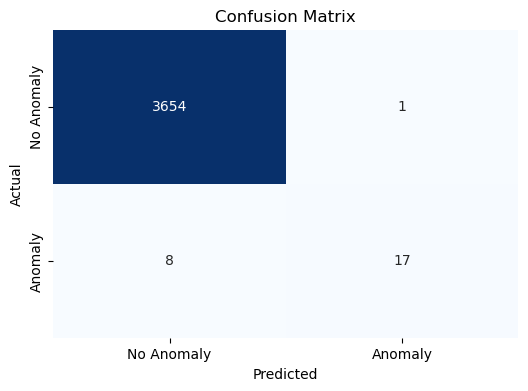

In [19]:
cm = confusion_matrix(y_test, y_test_pred)

# Plot Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['No Anomaly', 'Anomaly'], yticklabels=['No Anomaly', 'Anomaly'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

As from above metrics we can see that the success metrics of the accuracy of the model on the test data set is > 75%